<a href="https://colab.research.google.com/github/chrissaba3/COVID-19-NN/blob/main/Covid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import io
import pandas as pd
from graphviz import Source
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt

Saving formatted_data.csv to formatted_data.csv


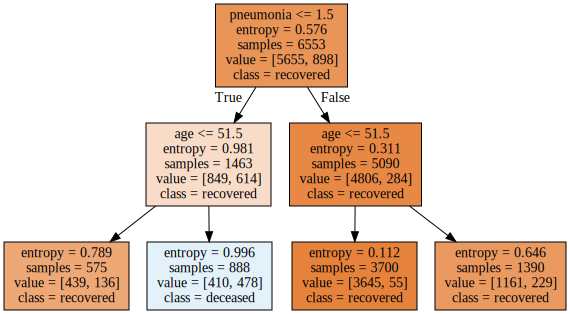

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['formatted_data.csv']))

X = data.iloc[:8192,1:15].copy()
Y = data.iloc[:8192,-1:].copy()

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2,
                                                 random_state = 42)

tree_classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_classifier_entropy.fit(X_train,y_train)


export_graphviz(tree_classifier_entropy,out_file=("covid_tree_entropy.dot"),
                feature_names = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia'],
                class_names=['recovered','deceased'],
                filled = True)


Source.from_file("covid_tree_entropy.dot")

In [ ]:
y_pred = tree_classifier_entropy.predict(X_test)
accuracy_score(y_test,y_pred)

0.8663819402074435

In [ ]:
print(X_train)

      sex  age  pregnancy  diabetes  ...  obesity  renal_chronic  tobacco  pneumonia
1691    2   40         97         2  ...        2              2        2          2
7879    2   48         97         2  ...        2              2        2          2
6496    2   49         97         2  ...        2              2        2          1
4934    1   52          2         2  ...        2              2        2          2
4266    2   45         97         2  ...        2              2        2          2
...   ...  ...        ...       ...  ...      ...            ...      ...        ...
5226    1   57          2         2  ...        1              2        2          2
5390    2   32         97         2  ...        2              2        1          1
860     1   49          2         2  ...        2              2        1          2
7603    1   51         98         2  ...        2              2        2          2
7270    2   43         97         2  ...        1              2 

In [ ]:
classification_data = data.copy()

classification_data['classes'] = classification_data['deceased']

print(classification_data)

      Unnamed: 0  sex  age  pregnancy  ...  intubed  patient_type  deceased  classes
0              0    2   27         97  ...        0             1         0        0
1              1    2   24         97  ...        0             1         0        0
2              2    1   54          2  ...        2             2         0        0
3              3    2   30         97  ...        2             2         0        0
4              4    1   60          2  ...        2             2         1        1
...          ...  ...  ...        ...  ...      ...           ...       ...      ...
8187        8187    2   66         97  ...        0             1         0        0
8188        8188    2   45         97  ...        0             1         0        0
8189        8189    2   42         97  ...        0             1         0        0
8190        8190    1   47          2  ...        0             1         0        0
8191        8191    2   77         97  ...        2             2

In [ ]:
for i in range(len(classification_data['classes'])):
 if classification_data['classes'][i] == 1:
   classification_data.loc[i,'classes'] = 'deceased'


for i in range(len(classification_data['classes'])):
 if classification_data['classes'][i] == 0:
   classification_data.loc[i,'classes'] = 'recovered'
print(classification_data)



      Unnamed: 0  sex  age  ...  patient_type  deceased    classes
0              0    2   27  ...             1         0  recovered
1              1    2   24  ...             1         0  recovered
2              2    1   54  ...             2         0  recovered
3              3    2   30  ...             2         0  recovered
4              4    1   60  ...             2         1   deceased
...          ...  ...  ...  ...           ...       ...        ...
8187        8187    2   66  ...             1         0  recovered
8188        8188    2   45  ...             1         0  recovered
8189        8189    2   42  ...             1         0  recovered
8190        8190    1   47  ...             1         0  recovered
8191        8191    2   77  ...             2         0  recovered

[8192 rows x 20 columns]


In [ ]:
X_classification = classification_data.iloc[:5000,1:15].copy()

print(X_classification)

      sex  age  pregnancy  diabetes  ...  obesity  renal_chronic  tobacco  pneumonia
0       2   27         97         2  ...        2              2        2          2
1       2   24         97         2  ...        2              2        2          2
2       1   54          2         2  ...        1              2        2          2
3       2   30         97         2  ...        2              2        2          1
4       1   60          2         1  ...        2              2        2          2
...   ...  ...        ...       ...  ...      ...            ...      ...        ...
4995    2   62         97         2  ...        2              2        2          2
4996    2   30         97         2  ...        2              2        2          2
4997    1   55          2         1  ...        1              2        2          2
4998    2   73         97         2  ...        2              2        2          1
4999    2   76         97         2  ...        2              2 

In [ ]:
Y_classes =  classification_data.iloc[:5000,-1:]
Y_classes = pd.get_dummies(Y_classes)
print(Y_classes)

      classes_deceased  classes_recovered
0                    0                  1
1                    0                  1
2                    0                  1
3                    0                  1
4                    1                  0
...                ...                ...
4995                 0                  1
4996                 0                  1
4997                 0                  1
4998                 1                  0
4999                 0                  1

[5000 rows x 2 columns]


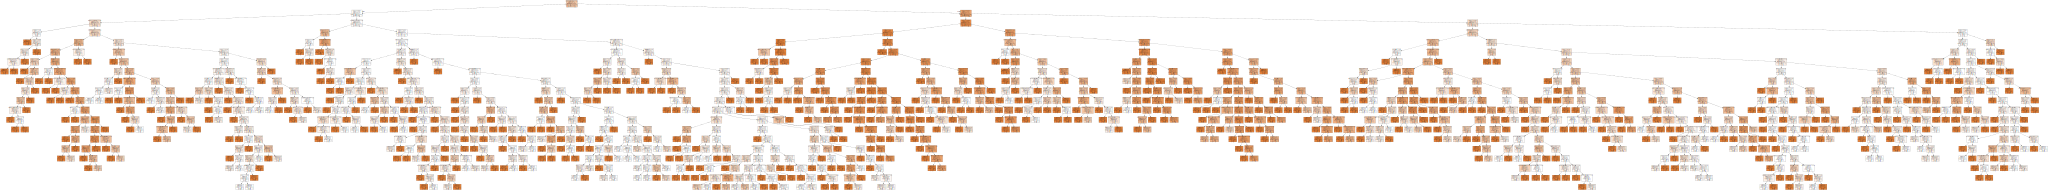

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_classification, Y_classes, test_size=0.2,
                                                 random_state = 42)

tree_classifier_entropy = DecisionTreeClassifier(criterion='gini', max_depth=19)
tree_classifier_entropy.fit(X_train,y_train)



export_graphviz(tree_classifier_entropy,out_file=("covid_tree_entropy.dot"),
                feature_names = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia'],
                class_names=['deceased','recovered'],
                filled = True)


Source.from_file("covid_tree_entropy.dot")

In [ ]:
y_pred = tree_classifier_entropy.predict(X_test)
accuracy_score(y_test,y_pred)


0.801

In [ ]:
count = 0
true_id = 0
index =[0] * 1259
for i in range(len(data['deceased'])):
  if data['deceased'][i] == 1:
    count += 1
    index[true_id] = i
    true_id += 1


features = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia']
biased_target = classification_data['classes'][:1113]

biased_target = pd.get_dummies(biased_target)
biased_data = classification_data.iloc[:count,1:15]

for i in range(len(features)):
  for j in range(count):
    biased_data[features[i]][j] = classification_data[features[i]][index[j]]

for i in range(count):
  biased_target['deceased'][i] = 1
  biased_target['recovered'][i] = 0
print(biased_data)


      sex  age  pregnancy  diabetes  ...  obesity  renal_chronic  tobacco  pneumonia
0       1   60          2         1  ...        2              2        2          2
1       2   47         97         1  ...        2              2        2          1
2       1   61          2         2  ...        2              2        2          2
3       2   77         97         2  ...        2              2        2          1
4       1   53          2         1  ...        1              2        2          1
...   ...  ...        ...       ...  ...      ...            ...      ...        ...
1108    2   64         97         1  ...       98              2        1          1
1109    1   53          2         1  ...        2              2        2          1
1110    1   42          2         2  ...        1              2        2          1
1111    1   83          2         1  ...        2              2        2          1
1112    1   83          2         2  ...        2              2 

In [ ]:
print(biased_target)

In [ ]:
y_pred = tree_classifier_entropy.predict(biased_data)
accuracy_score(biased_target,y_pred)

0.5884995507637018

In [ ]:
print(y_pred)

In [ ]:
params = {'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, 
                              verbose=1, cv=3)

grid_search_cv.fit(X_train,y_train)
y_pred = grid_search_cv.predict(biased_data)
accuracy_score(biased_target,y_pred)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    5.4s finished


0.4995507637017071

In [ ]:
print(grid_search_cv.best_params_)

{'max_leaf_nodes': 13, 'min_samples_split': 2}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.828


In [ ]:
y_pred=clf.predict(biased_data)

print("Accuracy:",metrics.accuracy_score(biased_target, y_pred))

Accuracy: 0.6244384546271339


In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia']).sort_values(ascending=False)
feature_imp

age               0.551162
pneumonia         0.189173
hypertension      0.039559
diabetes          0.039511
obesity           0.034538
tobacco           0.023553
renal_chronic     0.019387
cardiovascular    0.019007
other_diseaase    0.018890
copd              0.016407
sex               0.013776
pregnancy         0.013410
inmsupr           0.013059
asthma            0.008569
dtype: float64

In [50]:
covid_data = files.upload()



Saving covid.csv to covid.csv


In [63]:
data = pd.read_csv(io.BytesIO(covid_data['covid.csv']))

data.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [64]:
data_copy = data.copy()
data_copy.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [65]:
data.shape

(566602, 23)

In [66]:
data_copy.shape

(566602, 23)

In [67]:
data_copy = data_copy.drop(columns=['id'])
data_copy.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [68]:
data_copy = data_copy.drop(columns=['entry_date'])
data_copy.head()

,sex,patient_type,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [69]:
data_copy = data_copy.drop(columns='date_symptoms')
data_copy.head()

,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [70]:
deceased  = [0]* data_copy.shape[0]
for i in range(data_copy.shape[0]):
  if data_copy['date_died'][i] != "9999-99-99":
    deceased[i] = 1


In [71]:
training_set = data_copy.copy()
training_set['deceased'] = deceased
training_set.head()

,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,deceased
0,2,1,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,0
1,2,1,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,0
2,1,2,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,0
3,2,2,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,0
4,1,2,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,1


In [72]:
training_set.head()
training_set = training_set.drop(columns=['date_died'])

In [73]:
training_set.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,deceased
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,0
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,0
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,0
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,0
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,1


In [74]:
training_set.shape

(566602, 20)

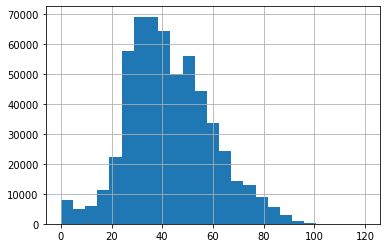

In [83]:
training_set.age.hist(bins=25)

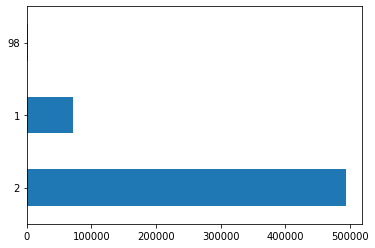

In [84]:
training_set.diabetes.value_counts().plot(kind='barh')
plt.show()

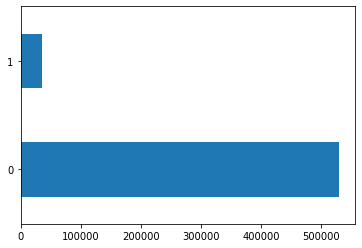

In [85]:
training_set.deceased.value_counts().plot(kind='barh')
plt.show()

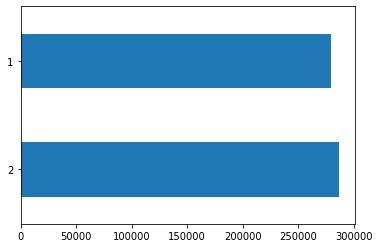

In [86]:
training_set.sex.value_counts().plot(kind='barh')
plt.show()

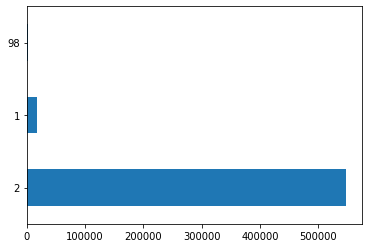

In [87]:
training_set.asthma.value_counts().plot(kind='barh')
plt.show()

In [88]:
training_set.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,deceased
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864,0.063847
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060,0.244481
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000,0.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,0.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000,0.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,1.000000


In [89]:
X = training_set.iloc[:,:19].copy()
X.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [90]:
Y = training_set.iloc[:,-1]
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: deceased, dtype: int64

In [91]:
Y.shape

(566602,)

In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3,
                                                 random_state = 42)

In [103]:
X_test.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
337397,1,1,97,2,69,2,1,2,2,2,2,2,2,1,2,2,1,2,97
30381,1,1,97,2,50,2,2,2,2,2,2,2,2,2,2,2,99,1,97
126727,2,1,97,2,66,97,2,2,2,2,2,1,2,2,2,2,2,1,97
74653,1,1,97,2,38,2,2,2,2,2,2,1,2,2,2,2,99,1,97
273785,1,2,2,2,26,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [65]:
params = {'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(criterion='entropy',random_state=42), params, 
                              verbose=1, cv=3)

grid_search_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:  5.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [66]:
predictions = grid_search_cv.predict(X_test)
accuracy_score(predictions,Y_test)

0.9441996458427706

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

In [97]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9364164230119837


In [104]:
feature_imp = pd.Series(clf.feature_importances_,index=['sex','patient_type','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid','covid_res','icu']).sort_values(ascending=False)
feature_imp

age                    0.354662
intubed                0.110185
patient_type           0.086192
pneumonia              0.081128
icu                    0.074604
covid_res              0.063008
contact_other_covid    0.050782
obesity                0.024812
diabetes               0.023820
hypertension           0.022953
tobacco                0.017744
other_diseaase         0.015806
cardiovascular         0.014461
renal_chronic          0.013722
copd                   0.012801
inmsupr                0.011812
asthma                 0.008144
pregnancy              0.007049
sex                    0.006316
dtype: float64

In [106]:
import joblib
# Save model
joblib.dump(clf, "./random_forest.joblib")

['./random_forest.joblib']